### [N-Queen](https://school.programmers.co.kr/learn/courses/30/lessons/12952)

- 시간복잡도를 충족하기 위해선 2차원 매트릭스가 아닌 1차원 매트릭스로 계산해야함  
- 모든 퀸은 같은 행/열에 존재할 수 없으므로, 이를 1차원으로 압축해 표현하고 이를 고려한 코드를 적용하면 복잡도 문제 해결 가능

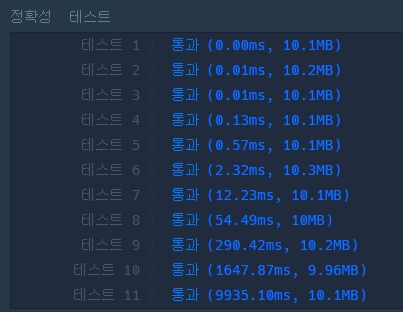

In [31]:
def is_safe(board, row, col, n):
    # 이전 행들에 대해 체크
    for i in range(row):
        # 같은 열에 있거나, 대각선에 있는지 확인
        if board[i] == col or \
           board[i] - i == col - row or \
           board[i] + i == col + row:
            return False
    return True

def solve_n_queens(n, board, row):
    if row == n:  # 모든 퀸을 배치한 경우
        print(board)
        return 1
    
    count = 0
    for col in range(n):
        if is_safe(board, row, col, n):
            board[row] = col  # 퀸 배치
            count += solve_n_queens(n, board, row + 1)  # 다음 행으로 이동
            board[row] = -1  # 백트래킹을 위해 초기화
    
    return count

def solution(n):
    board = [-1] * n  # 초기화된 체스판 (각 행에 퀸의 위치를 나타냄)
    return solve_n_queens(n, board, 0)

In [35]:
solution(5)

[0]


1

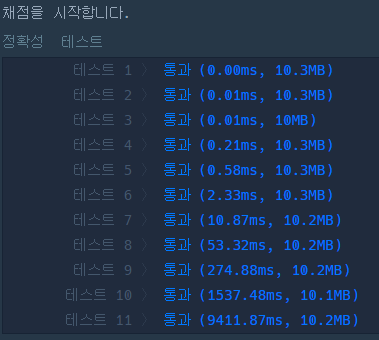

In [ ]:
def solution(n):
    def is_not_under_attack(row, col):
        # 이전 행들에 대해 공격 가능 여부를 판단
        for prev_row in range(row):
            # 같은 열에 있거나, 대각선에 있는 경우
            if cols[prev_row] == col or \
               abs(cols[prev_row] - col) == abs(prev_row - row):
                return False
        return True
    
    def place_queens(row):
        if row == n:
            # 모든 퀸을 배치 완료
            nonlocal count
            count += 1
            return
        
        for col in range(n):
            if is_not_under_attack(row, col):
                cols[row] = col  # 퀸을 배치
                place_queens(row + 1)
                cols[row] = -1  # 퀸을 제거 (백트래킹)
    
    count = 0
    cols = [-1] * n
    place_queens(0)
    return count


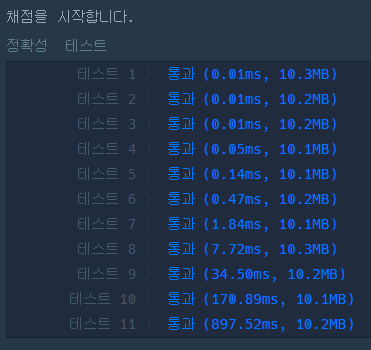

- 더 빠르게 할 수 없을까?  

=> 두 개의 리스트를 이용해 탐색이 아닌 기울기를 고려해 왼쪽 대각선과 오른쪽 대각선을 체크  
=> 왼쪽 대각선은 'row - col'값이 같으면 충돌하고, 오른쪽 대각선은 'row + col'값이 같으면 충돌  
=> 이를 통해 O(n) 연산을 O(1)로 줄임

복습!

In [38]:
def solution(n):
    def place_queens(row):
        nonlocal count
        if row == n:
            count += 1
            return
        
        for col in range(n):
            if not cols[col] and not left_diagonal[row - col] and not right_diagonal[row + col]:
                # 퀸 배치
                cols[col] = left_diagonal[row - col] = right_diagonal[row + col] = True
                place_queens(row + 1)
                # 퀸 제거 (백트래킹)
                cols[col] = left_diagonal[row - col] = right_diagonal[row + col] = False
    
    count = 0
    cols = [False] * n
    left_diagonal = [False] * (2 * n - 1)
    right_diagonal = [False] * (2 * n - 1)
    
    place_queens(0)
    return count


In [39]:
solution(5)

10

### [이중우선순위큐](https://school.programmers.co.kr/learn/courses/30/lessons/42628)

- 이중이니까 그냥 두 개 이용해서 하는게 제일 나음

In [92]:
import heapq

def solution(operations):
    
    small, big = [], []
    heapq.heapify(small), heapq.heapify(big)
    
    for operation in operations:
        op, num = operation.split()
        if op == 'I':
            value = int(num)
            heapq.heappush(small, value), heapq.heappush(big, -value)
        elif small:
            if num == '-1':
                v = heapq.heappop(small)
                big.remove(-v)
            elif num == '1':
                v = heapq.heappop(big)
                small.remove(-v)

    if not small:
        return [0,0]
    else :
        return [-heapq.heappop(big), heapq.heappop(small)]

In [93]:
operations = ["I 16", "I -5643", "D -1", "D 1", "D 1", "I 123", "D -1"]
solution(operations)

[0, 0]